# Importowanie bibliotek

### Dodanie ścieżki do projektu

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imporotowanie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from src.utils import save
from src.utils import save, paths
from pathlib import Path
from src.scrapers import healthdata, koronawirusunas, meteostat, policjapl, rmf24, wiki_demo, wiki_urban

# Wczytanie danych

In [3]:
df = pd.read_csv(Path(paths.get_path(), "df.csv"), index_col=0, parse_dates=True, dayfirst=True)

Sprawdzam czy w danych nie ma braków, a jeżeli są to uzupełniam je 0.

In [4]:
df.head(3)

,Unnamed: 0.1,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,...,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor,date
2020-01-01,12.0,19145.0,734.0,188.0,332.0,42.0,1.0,46.0,1.4,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-02,11.0,14654.0,513.0,333.0,166.0,60.0,5.0,67.0,0.8,-1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-03,10.0,15507.0,468.0,405.0,122.0,62.0,3.0,69.0,0.5,-4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
df.tail(3)

,Unnamed: 0.1,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,...,chor,zgo,wyl,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor,date
2020-05-26,1.0,15783.0,562.0,281.0,144.0,48.0,3.0,54.0,13.9,8.0,...,11030.0,1024.0,10020.0,-31.65,-5.06,2171.0,78864.0,0.0,19139.0,146.0
2020-05-27,0.0,16226.0,596.0,311.0,186.0,60.0,6.0,65.0,14.8,8.0,...,11115.0,1028.0,10330.0,-31.65,-5.06,2320.0,79007.0,0.0,19682.0,147.0
2020-05-28,0.0,16226.0,596.0,311.0,186.0,60.0,6.0,65.0,15.9,8.0,...,11227.0,1038.0,10560.0,-31.65,-5.06,2248.0,79818.0,0.0,19373.0,148.0


In [6]:
woj = koronawirusunas.SUB_SITES
wojewodztwa = pd.DataFrame()
for i in range(1, len(woj)):
    dat = pd.read_csv(Path(paths.get_path(), woj[i][12:] + ".csv"), index_col=0, parse_dates=True, dayfirst=True)
    dat.fillna(axis=1, inplace=True, value=0)
    dat["wojewodztwo"] = np.nan
    dat.fillna(axis=1, inplace=True, value=woj[i][12:])
    dat["date"] = (dat.index - dat.index.min())  / np.timedelta64(1,'D')
    wojewodztwa = wojewodztwa.append(dat)

# Przygotowanie danych do analizy

In [7]:
df = df[df.index < "2020-05-20"]
df = df[df['confirmed_infections'] != 0]
df['zar_log'] = np.log(df["confirmed_infections"])

## Przygowowanie danych dla Śląska

In [8]:
df['suma'] =  df['confirmed_infections'].cumsum()
df.loc[min(wojewodztwa.index):max(wojewodztwa.index),'suma'] = df.loc[min(wojewodztwa.index):max(wojewodztwa.index)]['suma'] - wojewodztwa[wojewodztwa.wojewodztwo == "slaskie"].zar
df['diff'] = df['suma'].diff(1)

# Analiza

In [9]:
df.head(1)

,Unnamed: 0.1,Interwencje,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,temperature,temperature_min,...,pieszo,pojazdem,hosp,kwar,kwar_z,nadzor,date,zar_log,suma,diff
2020-03-04,9.0,14200.0,564.0,384.0,134.0,63.0,6.0,69.0,5.3,4.2,...,2.14,1.92,65.0,349.0,0.0,4540.0,63.0,-0.137913,0.871175,NaN


## Wykresy dla całego kraju

Dane przedstawione na poniższych wykresach obejmują okres: 04.03.2020 - 19.05.2020

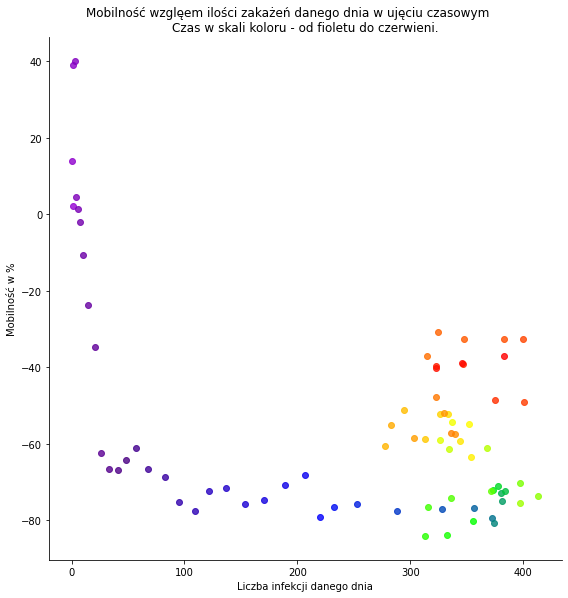

In [10]:
ax = sns.lmplot(x='confirmed_infections', y='pieszo', hue='date', data=df, palette=sns.blend_palette(colors=("#9400D3", "#4B0082", "#0000FF", "#00FF00", "#FFFF00", "#FF7F00", "#FF0000"),n_colors=len(df['date'])), legend=False, height = 8)
ax.set(ylabel='Mobilność w %', xlabel='Liczba infekcji danego dnia')
plt.title("Mobilność wzglęem ilości zakażeń danego dnia w ujęciu czasowym \
        \nCzas w skali koloru - od fioletu do czerwieni.")
plt.show()

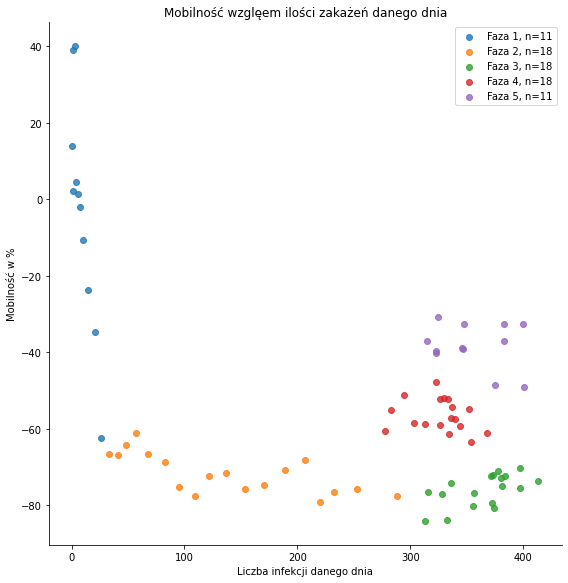

In [11]:
df.loc[0:11,'label'] = 0
df.loc[11:,'label'] = 1
df.loc[29:,'label'] = 2
df.loc[47:,'label'] = 3
df.loc[65:,'label'] = 4
ax = sns.lmplot(x="confirmed_infections", y="pieszo", data=df, fit_reg= False, height = 8, hue = "label", legend = False)
ax.set(ylabel='Mobilność w %', xlabel='Liczba infekcji danego dnia')
plt.legend(labels=['Faza 1, n=11', 'Faza 2, n=18', 'Faza 3, n=18', 'Faza 4, n=18', 'Faza 5, n=11'])
plt.title("Mobilność wzglęem ilości zakażeń danego dnia")
plt.show()

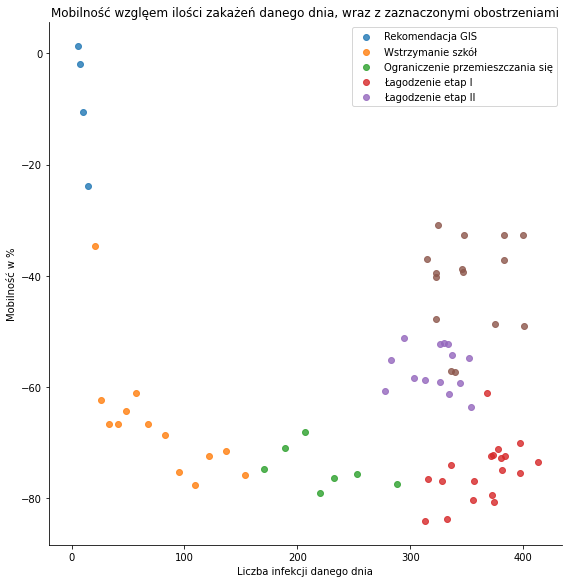

In [12]:
df.loc[df.index > "2020-03-8",'faza'] = 0
df.loc[df.index > "2020-03-12",'faza'] = 1
df.loc[df.index > "2020-03-25",'faza'] = 2
df.loc[df.index > "2020-04-01",'faza'] = 3
df.loc[df.index > "2020-04-20",'faza'] = 4
df.loc[df.index > "2020-05-04",'faza'] = 5
ax = sns.lmplot(x="confirmed_infections", y="pieszo", data=df, fit_reg= False, height = 8, hue = "faza", legend = False)
ax.set(ylabel='Mobilność w %', xlabel='Liczba infekcji danego dnia')
plt.legend(labels=['Rekomendacja GIS', 'Wstrzymanie szkół', 'Ograniczenie przemieszczania się','Łagodzenie etap I', 'Łagodzenie etap II'])
plt.title("Mobilność wzglęem ilości zakażeń danego dnia, wraz z zaznaczonymi obostrzeniami")
plt.show()

## Wykresy nie wliczając Śląska

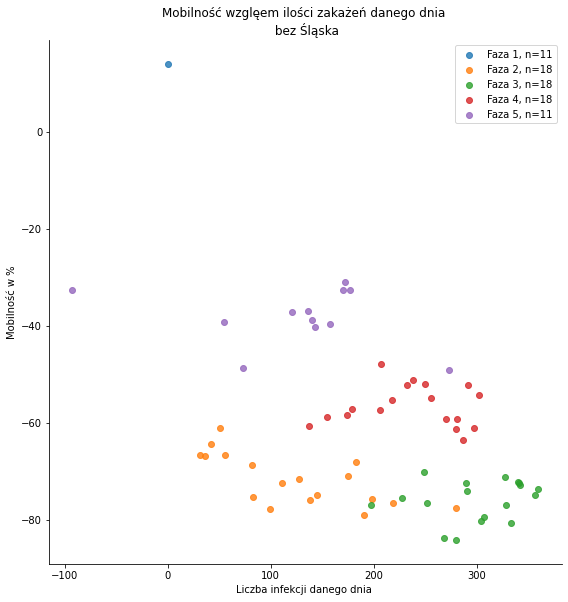

In [13]:
ax = sns.lmplot(x="diff", y="pieszo", data=df, fit_reg= False, height = 8, hue = "label", legend = False)
ax.set(ylabel='Mobilność w %', xlabel='Liczba infekcji danego dnia ')
plt.legend(labels=['Faza 1, n=11', 'Faza 2, n=18', 'Faza 3, n=18', 'Faza 4, n=18', 'Faza 5, n=11'])
plt.title("Mobilność wzglęem ilości zakażeń danego dnia \n bez Śląska")
plt.show()